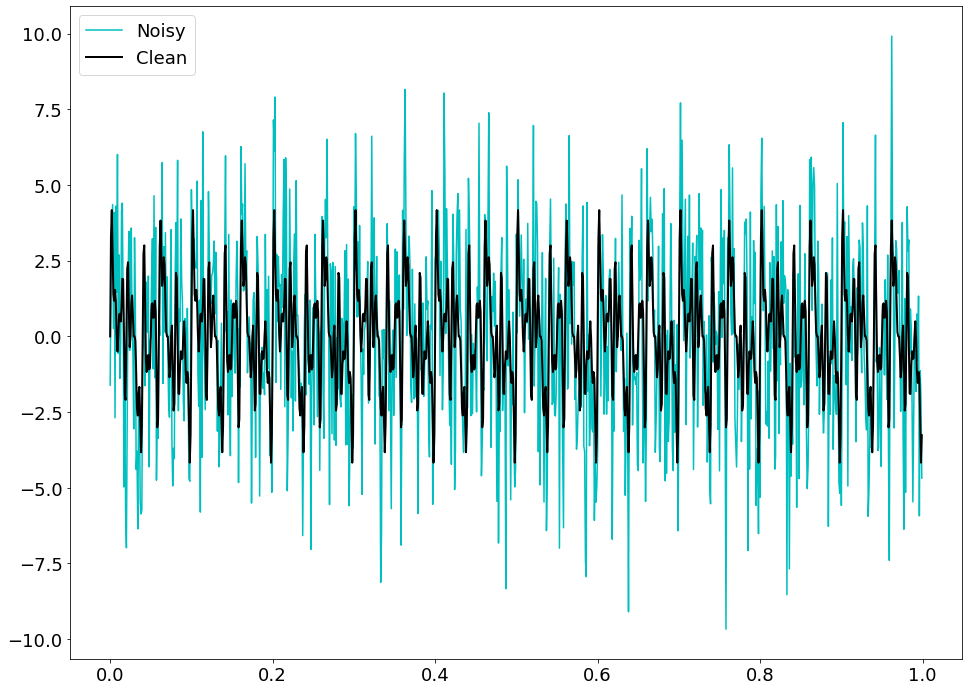

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

#Create a simple signal with two frequencies
dt= 0.001
t=  np.arange(0,1,dt)
f= np.sin(2*np.pi*20*t)+np.sin(2*np.pi*50*t)+np.sin(2*np.pi*80*t)+np.sin(2*np.pi*100*t)+np.sin(2*np.pi*150*t)+np.sin(2*np.pi*200*t)    #Sum of 4 frequencies
f_clean = f
f = f+ 2.5*np.random.randn(len(t))                                                         #Add some noise

plt.plot(t,f,color='c', linewidth=1.5, label='Noisy')
plt.plot(t,f_clean, color = 'k',linewidth=2, label='Clean')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


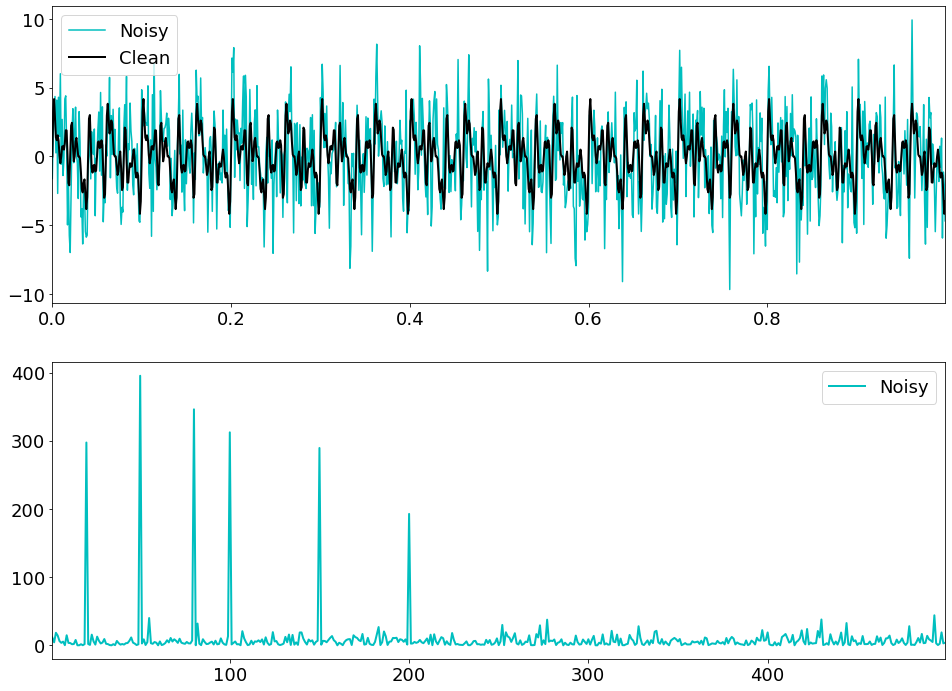

In [22]:
# Compute the Fast Fourier Transform

n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat*np.conj(fhat)/n
freq = (1/(dt*n))*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c', linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label="Clean")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',linewidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

In [23]:
#Use the PSD to filter out the noise

indicies = PSD > 100          #Find all freqs with large power
PSDclean = PSD * indicies     #Zero out all others
fhat= indicies * fhat         #Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat)     #Inverse FFT for filtered time signal

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


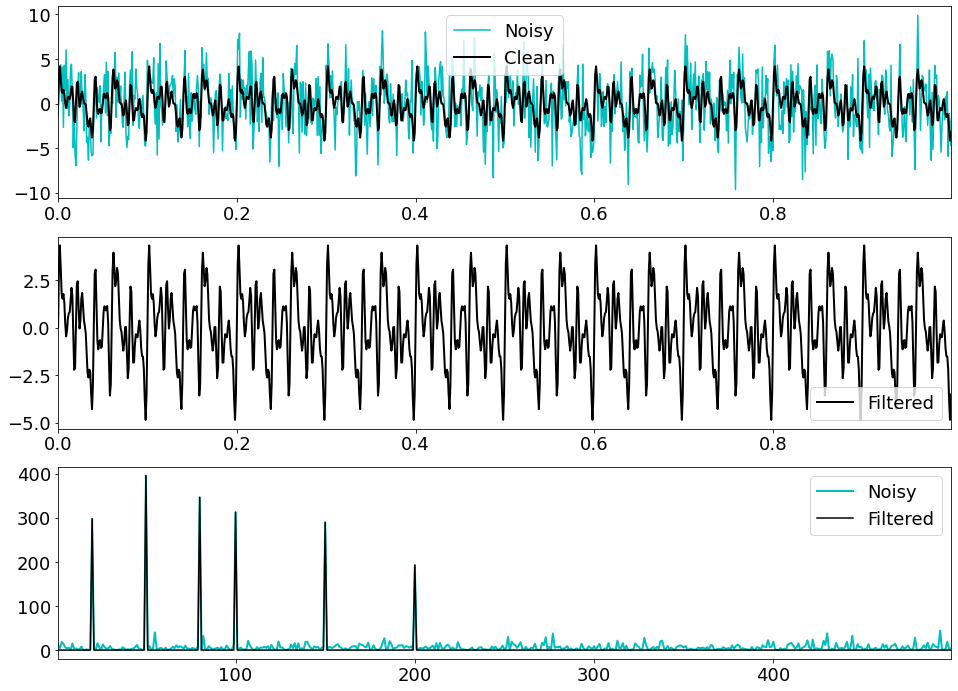

In [24]:
##Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='c', linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label="Clean")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='k', linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='k',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()